<a href="https://colab.research.google.com/github/greypen2006/Final_Project/blob/main/N6.Spatial_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spatial plots

Opening and preparing the data:

In [108]:
%%capture
!pip install Basemap
!pip install ipyleaflet
!pip install -q gdown

In [109]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab
from datetime import datetime
import geopandas as gpd

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 8)

# Crime, rent and composite scores

In [110]:
!mkdir -p data
!curl -L 'https://drive.google.com/uc?export=download&id=1t80nyeEaAmFW2r0PaOrdXqcojujFnh3M' -o ./data/composite.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1217  100  1217    0     0   1007      0  0:00:01  0:00:01 --:--:--  1447


In [111]:
composite = pd.read_csv("./data/composite.csv")
composite.head()

,Unnamed: 0,BoroughName,rent price,sexual crime,crime_score,rent_score,Composite_Score
0,0,Brent,1640.333333,0.198924,1.000000,0.932357,0.966178
1,2,Greenwich,1525.888889,0.241167,0.873348,1.000000,0.936674
2,9,Tower Hamlets,1860.555556,0.252250,0.840118,0.802193,0.821156
3,8,Southwark,1819.333333,0.275499,0.770414,0.826558,0.798486
4,7,Lambeth,1853.222222,0.298752,0.700696,0.806528,0.753612


In [112]:
#rename the borough column for simplicity:
composite = composite.rename(columns={"BoroughName": "Borough"})
#Only keep the columns we need:
composite = composite[["Borough", "rent_score", "crime_score", "Composite_Score"]]
composite.head()

,Borough,rent_score,crime_score,Composite_Score
0,Brent,0.932357,1.000000,0.966178
1,Greenwich,1.000000,0.873348,0.936674
2,Tower Hamlets,0.802193,0.840118,0.821156
3,Southwark,0.826558,0.770414,0.798486
4,Lambeth,0.806528,0.700696,0.753612


# Borough Boundaries

In [113]:
#import london boroughs map:
!curl -L 'https://drive.google.com/uc?export=download&id=1IQruCP7xH5sSQ6UCOAhZzcdRW-O_4ykw' -o ./data/london_boroughs.gpkg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  836k  100  836k    0     0   557k      0  0:00:01  0:00:01 --:--:-- 5291k


In [114]:
boroughs = gpd.read_file("./data/london_boroughs.gpkg")
boroughs.head()

,objectid,name,gss_code,hectares,nonld_area,ons_inner,sub_2011,geometry
0,1,Kingston upon Thames,E09000021,3726.117,0.000,F,South,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,2,Croydon,E09000008,8649.441,0.000,F,South,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,3,Bromley,E09000006,15013.487,0.000,F,South,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,4,Hounslow,E09000018,5658.541,60.755,F,West,"POLYGON ((509703.4 175356.6, 509712.6 175361.8..."
4,5,Ealing,E09000009,5554.428,0.000,F,West,"POLYGON ((515647.2 178787.8, 515608.8 178787.3..."


# Choropleth mapping

In [115]:
#rename it to match the other datasets:
boroughs = boroughs.rename(columns={"name": "Borough"})
#merge everything together:
boroughs_scores = boroughs.merge(composite, on="Borough", how="left")
boroughs_scores.head()

,objectid,Borough,gss_code,hectares,nonld_area,ons_inner,sub_2011,geometry,rent_score,crime_score,Composite_Score
0,1,Kingston upon Thames,E09000021,3726.117,0.000,F,South,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",NaN,NaN,NaN
1,2,Croydon,E09000008,8649.441,0.000,F,South,"POLYGON ((535009.2 159504.7, 535005.5 159502, ...",NaN,NaN,NaN
2,3,Bromley,E09000006,15013.487,0.000,F,South,"POLYGON ((540373.6 157530.4, 540361.2 157551.9...",NaN,NaN,NaN
3,4,Hounslow,E09000018,5658.541,60.755,F,West,"POLYGON ((509703.4 175356.6, 509712.6 175361.8...",NaN,NaN,NaN
4,5,Ealing,E09000009,5554.428,0.000,F,West,"POLYGON ((515647.2 178787.8, 515608.8 178787.3...",NaN,NaN,NaN


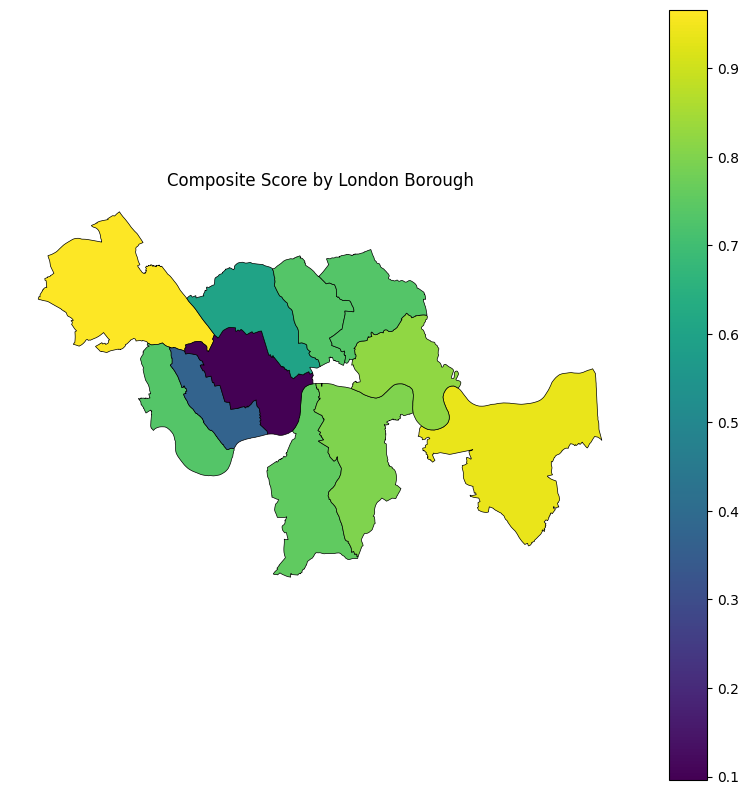

In [116]:
fig, ax = plt.subplots(figsize=(10, 10))

boroughs_scores.plot(
    column="Composite_Score",
    cmap="viridis",
    legend=True,
    edgecolor="black",
    linewidth=0.5,
    ax=ax
)

ax.set_title("Composite Score by London Borough")
ax.axis("off")
plt.show()

The map above correctly depicts what we want, but we can make it neater and add some important information to it:

In [117]:
#add a rank to each borough based on their composite ranking
boroughs_scores["composite_rank"] = (boroughs_scores["Composite_Score"].rank(ascending=False, method="min"))
boroughs_scores["composite_rank"] = (boroughs_scores["composite_rank"].where(boroughs_scores["composite_rank"].notna()).astype("Int64"))

In [118]:
#make a background with all other boroughs we are not using for clarity in the final map:
background = boroughs.copy()
scored = boroughs_scores[boroughs_scores["Composite_Score"].notna()].copy()
#make sure they both overlap correctly:
background = background.to_crs(epsg=27700)
scored = scored.to_crs(epsg=27700)
#round the values
for col in ["Composite_Score", "crime_score", "rent_score"]:
    scored[col] = scored[col].round(2)

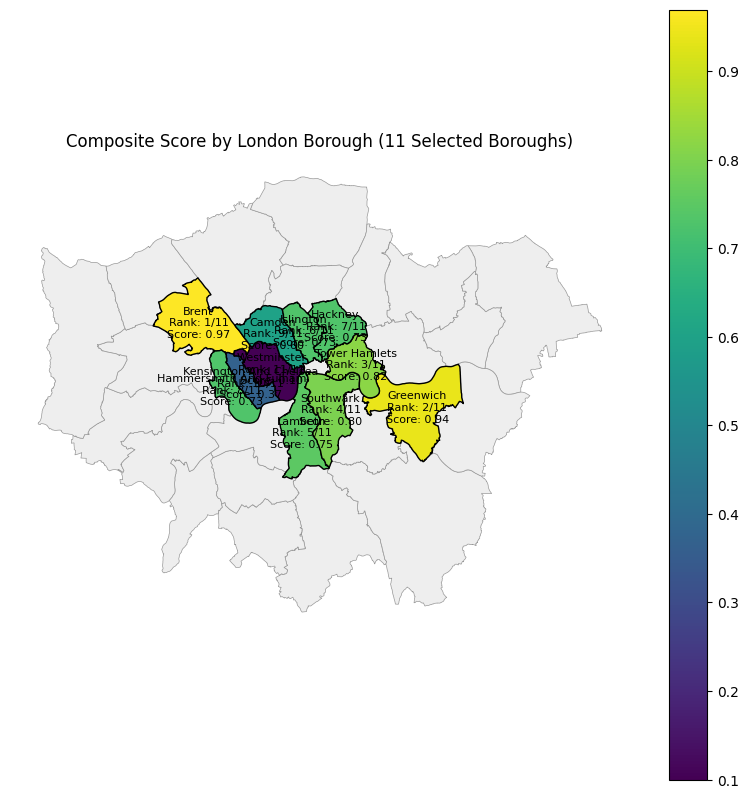

In [119]:
#Create a static but informational map:
fig, ax = plt.subplots(figsize=(10, 10))

# Background boroughs
background.plot(
    ax=ax,
    color="#eeeeee",
    edgecolor="#999999",
    linewidth=0.5
)

# Scored boroughs
scored.plot(
    column="Composite_Score",
    cmap="viridis",
    legend=True,
    edgecolor="black",
    linewidth=1,
    ax=ax
)

# Labels
for _, row in scored.iterrows():
    x, y = row.geometry.centroid.coords[0]
    ax.text(
        x, y,
        f"{row['Borough'].title()}\n"
        f"Rank: {row['composite_rank']}/11\n"
        f"Score: {row['Composite_Score']:.2f}",
        fontsize=8,
        ha="center",
        va="center"
    )

ax.set_title("Composite Score by London Borough (11 Selected Boroughs)")
ax.set_aspect("equal")
ax.axis("off")

plt.show()

We now have a more detailed map but its very cluttered and not readable, so let's try to make it into an interactive map to fix that:

In [120]:
import folium
import branca.colormap as cm

# Make sure rank is a normal number
scored = scored.copy()
scored["rank_num"] = scored["composite_rank"].astype(float)

# Create map
m = folium.Map(
    location=[51.5074, -0.1278],
    zoom_start=10,
    tiles="cartodbpositron"
)

# Background boroughs
folium.GeoJson(
    background,
    style_function=lambda x: {
        "fillColor": "#eeeeee",
        "color": "#999999",
        "weight": 1,
        "fillOpacity": 0.4,
    },
    interactive=False
).add_to(m)

# Choropleth layer
for col in scored.columns:
    if col != "geometry" and scored[col].apply(lambda x: hasattr(x, "geom_type")).any():
        scored = scored.drop(columns=[col])
folium.Choropleth(
    geo_data=scored,
    data=scored,
    columns=["Borough", "rank_num"],
    key_on="feature.properties.Borough",
    fill_color="YlGn",
    fill_opacity=0.85,
    line_opacity=1,
    legend_name="Composite Rank (Green = highest, Yellow = lowest)",
).add_to(m)

# Tooltip layer (hover info)
tooltip = folium.GeoJsonTooltip(
    fields=[
        "Borough",
        "Composite_Score",
        "rank_num",
        "crime_score",
        "rent_score"
    ],
    aliases=[
        "Borough:",
        "Composite score:",
        "Rank (out of 11):",
        "Crime score:",
        "Rent score:"
    ],
    localize=True,
    sticky=True
)

folium.GeoJson(
    scored,
    style_function=lambda x: {"fillOpacity": 0, "color": "black", "weight": 2},
    tooltip=tooltip,
    highlight_function=lambda x: {"weight": 3}
).add_to(m)

#add borough name and rank without needing to hover over the borough:

#create a centroid to put the names:
scored = scored.to_crs(epsg=4326)
centroids = scored.geometry.centroid
#add the text:
for idx, row in scored.iterrows():
    point = centroids.loc[idx]

    folium.Marker(
        location=[point.y, point.x],
        icon=folium.DivIcon(
            html=f"""
            <div style="
                font-size:8px !important;
                font-weight:bold;
                color:black;
                text-align:center;
                line-height:1.1;
                pointer-events:none;
            ">
                {row['Borough']}<br>
                {int(row['rank_num'])}
            </div>
            """
        )
    ).add_to(m)
m

/tmp/ipython-input-575952363.py:73: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = scored.geometry.centroid


In [121]:
m.save("london_borough_ranking.html")